In [74]:
import pandas as pd

titaninc_df  = pd.read_csv('C:/Users/user/Documents/ML/titanic/train.csv', encoding= 'utf-8')
titaninc_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 가설: 
 1. 비상상황특성상 여성을 배려해서 많이 생존
  - 1. pivot table을 만들어 확인
  - 2. 그래프를 통해서 확인 

In [75]:
pd.pivot_table(titaninc_df, index = 'Sex', columns = 'Survived',aggfunc='size')

Survived,0,1
Sex,,
female,81,233
male,468,109


In [76]:
len(titaninc_df)

891

- 정확도(Accuracy): 맞춘갯수 / 전체 데이터
- 생존을 맞춤
    - 여성은 다 살았을것이고, 남성은 모두 죽었을 것이다. 

In [77]:
(233+468)/891*100

78.67564534231201

<Axes: xlabel='Sex', ylabel='count'>

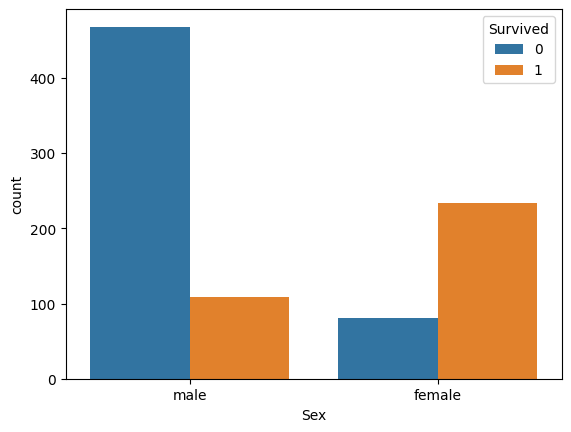

In [78]:
import seaborn as sns 
sns.countplot(titaninc_df, x = 'Sex', hue ='Survived')

In [79]:
titaninc_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 숫자
    - Age, SibSp,Parch, Fare
- 범주형
    - Pclass, Sex, Cabin, Embarked

- X변수 1개, Y변수(Survived)

In [80]:
# info(): 데이터에 대한 결측치, 데이터전체 갯수 등을
titaninc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
# X변수: Fare, Y변수: Survived
X_1 = titaninc_df[['Fare']]
y_true = titaninc_df[['Survived']]

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Fare', ylabel='Survived'>

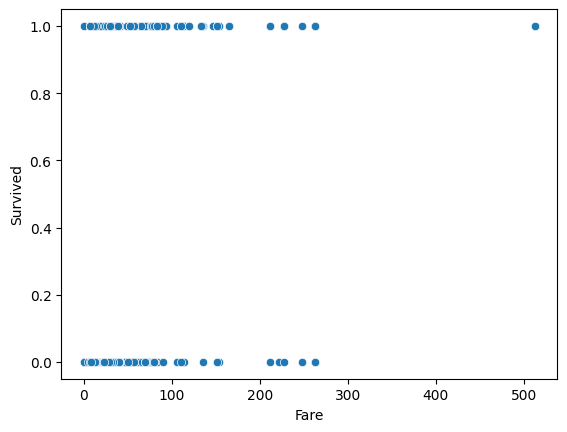

In [83]:
sns.scatterplot(titaninc_df, x = 'Fare',y = 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

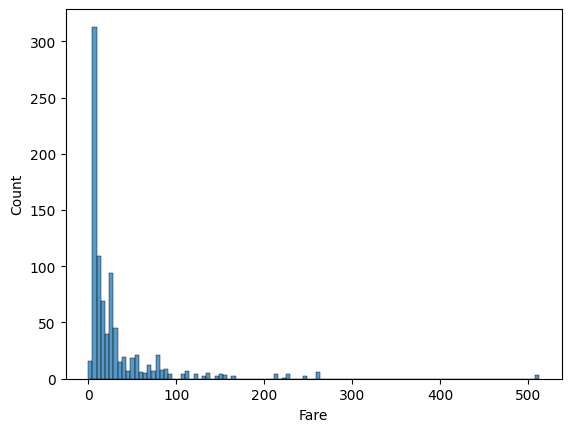

In [84]:
sns.histplot(titaninc_df, x = 'Fare')

In [85]:
# 수치형데이터를 확인하는 쉬운방법 describe()
titaninc_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
model_lor = LogisticRegression()
model_lor.fit(X_1, y_true)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

<Axes: xlabel='Fare', ylabel='Survived'>

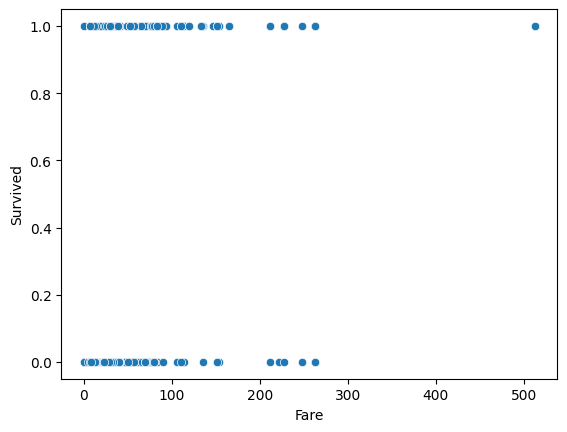

In [87]:
sns.scatterplot(titaninc_df, x = 'Fare', y = 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

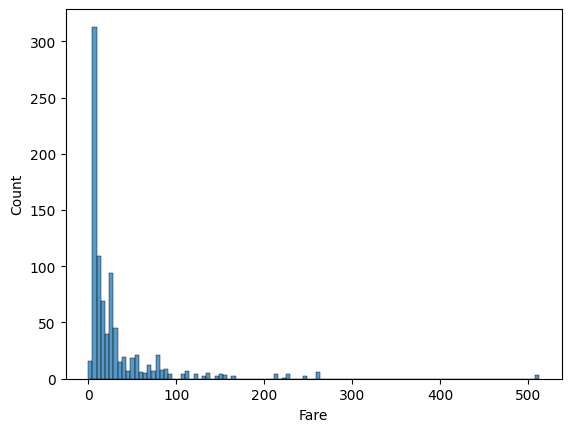

In [88]:
sns.histplot(titaninc_df, x = 'Fare')

In [89]:
# 데이터 기술통계를 보는법(수치형) describe()
titaninc_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
model_lor = LogisticRegression()
model_lor.fit(X_1, y_true)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [91]:
def get_att(x):
    #x모델을 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름',x.feature_names_in_)
    print('가중치',x.coef_)
    print('바이어스', x.intercept_)

In [92]:
get_att(model_lor)

클래스 종류 [0 1]
독립변수 갯수 1
들어간 독립변수(x)의 이름 ['Fare']
가중치 [[0.01519666]]
바이어스 [-0.94131796]


In [93]:
from sklearn.metrics import accuracy_score, f1_score
def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred))

In [94]:
y_pred_1 = model_lor.predict(X_1)
y_pred_1[:10]
len(y_pred_1)

891

In [95]:
get_metrics(y_true, y_pred_1)

정확도 0.6655443322109988
f1-score 0.35497835497835495


#가장 간단한 로지스틱 회귀실습 완료

## 다중로스틱회귀 
- 숫자
    - Age, SibSp,Parch, Fare
- 범주형
    - Pclass, Sex, Cabin, Embarked

- X변수 개, Y변수(Survived)

In [96]:
titaninc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
#Y(Surivved): 사망
#X(수치형): Fare
#X(범주형): Plcass(좌석등급), Sex

In [98]:
def get_sex(x):
    if x == 'female':
        return 0
    else:
        return 1
titaninc_df['Sex_en'] = titaninc_df['Sex'].apply(get_sex)

In [99]:
titaninc_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [100]:
X_2 = titaninc_df[['Pclass','Sex_en','Fare']]
y_true = titaninc_df[['Survived']]
model_lor_2 = LogisticRegression()
model_lor_2.fit(X_2,y_true)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [101]:
get_att(model_lor_2)

클래스 종류 [0 1]
독립변수 갯수 3
들어간 독립변수(x)의 이름 ['Pclass' 'Sex_en' 'Fare']
가중치 [[-8.88331324e-01 -2.53993425e+00  1.64019087e-03]]
바이어스 [3.02004403]


In [102]:
y_pred_2 = model_lor_2.predict(X_2)
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [103]:
y_pred_1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [104]:
# X변수가 Fare
get_metrics(y_true, y_pred_1)
# X변수가 Fare, Pclass, Sex
get_metrics(y_true, y_pred_2)

정확도 0.6655443322109988
f1-score 0.35497835497835495
정확도 0.7867564534231201
f1-score 0.7121212121212122


In [105]:
# 각 데이터별 Y=1인 확률 뽑아내기(생존할 확률)
model_lor_2.predict_proba(X_2)

array([[0.8977979 , 0.1022021 ],
       [0.09546762, 0.90453238],
       [0.40901264, 0.59098736],
       ...,
       [0.40287202, 0.59712798],
       [0.58880217, 0.41119783],
       [0.89772263, 0.10227737]])

In [106]:
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [1]:
import sklearn
sklearn.__version__

'1.3.2'